<a href="https://colab.research.google.com/github/gagyeomkim/DB_Learning/blob/main/DL/%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%99%80%EB%A1%9C%EC%84%9C%EA%B8%B0/Lec1/linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

코랩은 셀 단위로 코드가 실행됨  
* 실행 단축키 : Ctrl+Enter

In [ ]:
a = 5
print(a)

5


* 이전 코드블럭에 실행된 결과를 다른 셸에서도 접근가능(RAM에 저장되어있어서)  
* 데이터 전처리를 위한 프로세스가 있다고 가정해보자. 만약 데이터 전처리가 되고 나서야 학습을 하는 .py파일을 이용한다면, 그런데, 학습에 오류가 발생했을 시 매번 다시 데이터 전처리를 해야하고(어딘가에 데이터를 저장하지 않는다면), 디버깅도 오래걸리는 상황이 일어난다.
* 이를 해결하기 위해 주피터 노트북을 만듦
* 주피터 노트북은 계산된 결과가 사라지지 않는다. 학습에서 에러가 떠도 중간 결과가 램에 올라가 있어서 디버깅 사이클을 줄일 수 있다.

In [ ]:
b=3
c=4
print(a,b,c)

6 3 4


* 주의해야할 점은 순서가 꼬일 수 있다는 점이다. a = 6으로 업데이트 하고 싶은 경우가 생겼을 때, 위에서부터 순서대로 실행해버리면, 두번째 셸에 해당 결과가 업데이트 되지 않는다. 따라서 순서를 잘 생각해야한다.

In [ ]:
a = 6

---  

#1. Data Generation (Preparation)
Linear Regression 실습에 사용할 공부한 시간에 따른 성적 데이터를 만들어봅시다.

In [1]:
X = list(range(10))
Y = [ 1, 1, 2, 4, 5, 7, 8, 9, 9, 10]
print(len(Y))
print(len(X))

10
10


X, Y 데이터를 2D 평면 상에 시각화 해볼까요?



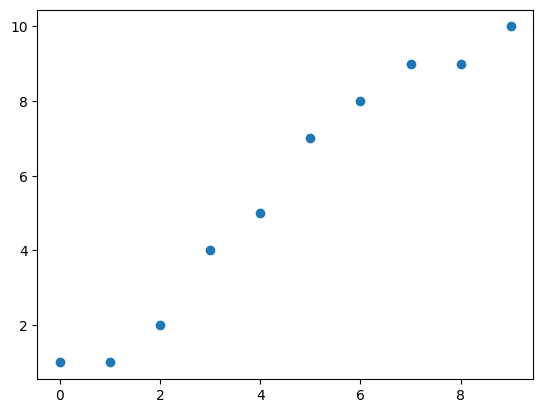

In [2]:
import matplotlib.pyplot as plt #as는 별칭을 지정

'''plot() : x축에 들어갈 값(list)와 y축에 들어갈 값(list)을 인자로 받아, 아래와 같이 입력시 x-y값을 그래프로 나타낸다.
            plt 특성상 같은 셸 안의 함수를 모두 그려주기에, 중첩해서 사용이 가능하다. '''
#plt.plot(X,Y)
plt.scatter(X,Y)
plt.show()

#2. Hypothesis Define (Model Define)
Linear Regression 시에 활용하는 f(x) = Wx + b에서 b가 없는 간단한 버전인 f(x) = Wx 라는 모델(가설)을 구현해봅니다.

In [23]:
class H:
    #메서드의 첫번째 인자는 꼭 self를 써야한다.
    def __init__(self,w):
    #처음에 모델의 파라미터(학습을 통해 최적화될 값) w를 인풋으로 받아 모델을 만들어준다.
    #또한, self.w로 쓰지 않고 w로 쓰면 다른 메서드에서 해당 값을 쓸 수 없다. -> 객체변수로 접근해야한다.
        self.w=w

    #Pytorch에서는 h(x)를 통과시킬 때 forward라는 함수를 쓴다.
    def forward(self,x):
        #인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴한다.
        return self.w * x

def cost(h,X,Y):
    error=0
    #각각의 instance에 대해 cost를 구하기
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i]) ** 2
    error = error / len(X)
    return error

h=H(4) # w=4인 f(x)=4x라는 모델이 만들어짐
print(h.w) #h의 객체변수 w에 접근
cost(h,X,Y)

4


222.2

4


222.2

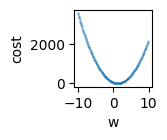

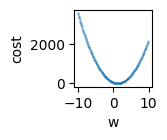

In [24]:
list_w=[]
list_c=[]
for i in range(-100,100):
    #w를 계속 변경해보는 코드
    w = i * 0.1
    h = H(w)
    #변경된 w마다 cost Function 계산
    c = cost(h,X,Y)
    #그래프를 그려주기 위해 list로 변형
    list_w.append(w)
    list_c.append(c)

'''plot() : x축에 들어갈 값(list)와 y축에 들어갈 값(list)을 인자로 받아, 아래와 같이 입력시 x-y값을 그래프로 나타낸다.
            plt 특성상 같은 셸 안의 함수를 모두 그려주기에, 중첩해서 사용이 가능하다.
            x,y에 대한 리스트를 넣는 것이 아니라, x에 대한 리스트, y에 대한 리스트를 따로 넣어주어야한다.
            또한, x리스트와, y리스트의 길이가 같아야한다'''
plt.figure(figsize=(1, 1))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1)

러닝메이트가 너무 크면 overshooting이 일어난다.

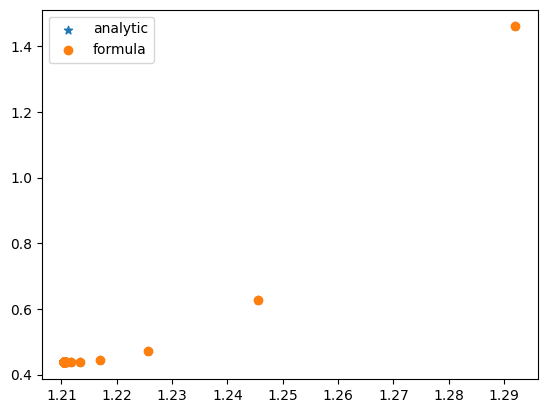

In [59]:
'''수치해석적 gradient'''
def cal_grad(w, cost):
    #원래 w에서 비용함수
    h = H(w)
    cost1 = cost(h, X, Y)
    #w+입실론과 w의 차이로 기울기 구하려고함
    eps = 0.00001
    h= H(w+eps)
    cost2 = cost(h, X, Y)
    #gradient 구한 것
    dcost = cost2-cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2)/2

'''편미분학적 gradient'''
def cal_grad2(w,cost):
    h=H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i])-Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c

#grad(4, cost) => 여기서 cost는 cost를 계산하는 함수를 인자로 넣어준 것
w1=1.4
w2=1.4
lr = 0.01 #보통 10^-3부터 러닝메이트를 줘본다. -> 이후 cost를 통해 적절한 러닝메이트 확인

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []
for i in range(100):
    grad1, mean_cost1 = cal_grad(w1,cost)
    grad2, mean_cost2 = cal_grad2(w2,cost)
    w1 -= lr * grad1
    w2 -= lr * grad2

    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost1)
    list_c2.append(mean_cost2)

    #print(f'w1일때의 grad {w1}, cost:', mean_cost1, f'\nw2일때의 grad {w2}, cost:', mean_cost2)
    #print('')
plt.scatter(list_w1,list_c1, label = 'analytic', marker= '*')
plt.scatter(list_w2,list_c2, label = 'formula')
plt.legend()